<a href="https://colab.research.google.com/github/alen8807/Ybigta_assignment/blob/main/0118%20ML/%20ML%20%EC%8B%A4%EC%8A%B5%20%EB%B0%8F%20%EA%B3%BC%EC%A0%9C%20%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2023-1 ML 교육세션 실습 자료를 참고했습니다.

In [1]:
# 데이터셋 불러오기
# spaceship_tt.csv 데이터프레임을 이용해, "Transported"값을 분류 대상으로 삼는 decision tree classifier 만들기
import numpy as np
import pandas as pd
df = pd.read_csv('/content/spaceship_tt.csv')

In [2]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId : 승객 ID

HomePlanet : 출발 행성(거주지)

CryoSleep : 취침 방식 여부

Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)

Destination : 목적지

Age : 승객의 나이

VIP : 승객의 VIP 서비스 유무

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 해당 서비스에 대해 지불한 금액

Name : 이름

Transported : 도착 여부

In [3]:
# 모델 라이브러리 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
# base dataframe
df_base=df[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]

In [5]:
df_base.dropna(inplace=True)

<ipython-input-5-3c1dfc79aac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.dropna(inplace=True)


In [6]:
df_base

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [7]:
# Model build
dt_clf = DecisionTreeClassifier(random_state=111)

# Train/test split 진행 (7:3)
X_train, X_test, y_train, y_test = train_test_split(df_base.drop('Transported',axis=1),
                                                    df_base['Transported'], # target variable = Transported
                                                    test_size=0.3, random_state=111)
# 모델 훈련
dt_clf = dt_clf.fit(X_train,y_train)

In [8]:
X_train

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5664,False,10.0,False,0.0,0.0,0.0,0.0,0.0
6303,False,28.0,False,32.0,0.0,304.0,291.0,2.0
963,False,0.0,False,0.0,0.0,0.0,0.0,0.0
6375,False,21.0,False,1244.0,0.0,1119.0,0.0,3.0
8299,False,34.0,False,0.0,3126.0,0.0,112.0,15.0
...,...,...,...,...,...,...,...,...
5017,True,38.0,False,0.0,0.0,0.0,0.0,0.0
5787,False,33.0,True,0.0,3095.0,0.0,197.0,40.0
2429,True,34.0,False,0.0,0.0,0.0,0.0,0.0
8421,False,39.0,False,2101.0,41.0,0.0,525.0,19.0


In [9]:
# 평가지표 출력
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.7601102941176471


# 다양한 모델을 통한 평가

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
# n_estimators를 변경 가능
# 모델별로 추가 parameter 튜닝 가능
rf_reg = RandomForestRegressor(n_estimators=200)
gbm_reg = GradientBoostingRegressor(n_estimators=200)
xgb_reg = XGBRegressor(n_estimators=200)
lgbm_reg = LGBMRegressor(n_estimators=200)

In [11]:
model = rf_reg  # random forest


# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환하는 함수 정의
from sklearn.metrics import mean_squared_error # regressor를 위한 평가 지표
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

    mse = mean_squared_error(y_test, pred)

    print('###', model.__class__.__name__, '###')
    print('Mean Squared Error:', mse)


In [12]:
get_model_predict(model,X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
Mean Squared Error: 0.46818790230237456


In [13]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_two_models_predict(model1, model2, X_train, X_test, y_train, y_test, is_expm1=False):
    model1.fit(X_train, y_train)
    model1_pred = model1.predict(X_test)
    model2.fit(X_train, y_train)
    model2_pred = model2.predict(X_test)

    pred = 0.4*model1_pred + 0.6*model2_pred # 각 모델의 반영 가중치 설정

    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred)

    print('### Two Models ###')
    print('Mean Squared Error:', mse)

In [14]:
model1 = rf_reg
model2 = gbm_reg  # GBM Model (Boosting)

get_two_models_predict(model1, model2, X_train, X_test, y_train, y_test, is_expm1=True)


### Two Models ###
Mean Squared Error: 0.45017063238408583


## 두 과제를 "ML_과제_(이름).ipynb" 의 파일명으로 제출해 주세요!


### 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

### **과제 1**

Dataset을 Grouping한다는 것은 데이터의 패턴이나 구조를 발견하고, 데이터를 비슷한 특성을 가진 그룹으로 분류하는 과정을 일컫는다고 할 수 있다. Grouping은 유사한 특성을 가진 데이터의 분류, 데이터의 구조 파악, 데이터의 차원 감소 및 특성 추출 등의 목적을 가지고 있다.
* Clustering(군집화)
1. K-means Clustering: K개의 평균값을 중심으로 데이터를 클러스터링(군집화)하는 방법으로 최적의 K값을 찾아주는 것이 중요하다. 초기 K값으로 인해 잘못된 결과가 도출될 가능성이 있으며, 이상치에 취약한 특징을 가지고 있다.
2. DBSCAN(Density Based Spatial Clustering of Applications with Noise): 밀도 기반 군집화의 대표적 예시로서 복잡한 기하학적 분포를 가진 데이터 세트에 대해서도 효과적인 군집화 수행이 가능하다.
3. Mean Shift: K-means clustering과 유사하나 거리 중심이 아닌, 데이터의 밀도가 가장 높은 곳으로 군집 중심점을 이동하면서 군집화를 수행하는 모델이다. 정형 데이터 세트보다는 이미지나 영상 데이터에서 특정 개체의 구분과 움직임 추적에 있어 뛰어난 역할을 수행해 컴퓨터 비전 영역에서 잘 이용된다.
4. Hierarchical Clustering: Hierarchical Clustering는 임의의 K를 설정할 필요없이 데이터를 가까운 집단부터 순차적이고, 계층적으로 군집화하는 방식이다. 트리구조를 생각해볼 수 있으며, local minimum을 찾아가는 방법을 활용하기에 클러스터링 결과값이 global minimum이라 해석하기가 어렵다.
* Dimensionality Reduction(차원축소)
1. PCA(Principal Component Analysis): 데이터의 분산을 최대화하는 축을 찾아 그 축을 기준으로 데이터를 재구성하는 방식으로 차원을 축소한다. 데이터의 시각화, 노이즈 제거, 데이터 압축 등의 다양한 목적으로 활용되며, 비선형 데이터의 경우에 적합하지 않다는 선형성의 한계점, 차원축소의 과정에서 정보 손실, 원래 데이터의 축과 달라 결과 해석의 어려움이 있다는 단점이 있다.
2. LLE(Locally-Linear Embedding): 투영(projection)이 아닌 매니폴드 학습(manifold learning)으로서 서로 인접한 데이터들을 보존하면서 고차원인 데이터셋을 저차원으로 축소하는 방법이다. 즉, 입력 데이터셋을 낮을 차원의 단일 글로벌 좌표계로 매핑하는 알고리즘이다.
3. SVD(Singular Value Decomposition): 행렬분해 방법 중 하나로 많은 feature을 가진 고차원 행렬을 저차원 행렬로 분리하는 기법이다. m X n 차원의 행렬을 U, Σ, V 세개의 행렬로 분해할 수 있다.

* 출처:
https://aboutnlp.tistory.com/61
https://ssung-22.tistory.com/68
https://daebaq27.tistory.com/49#google_vignette
https://on-ai.tistory.com/5
https://speedspeed.tistory.com/71
https://rfriend.tistory.com/736
https://excelsior-cjh.tistory.com/168
https://hyebiness.tistory.com/15


### 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from sklearn import metrics

In [16]:
diab = pd.read_csv('/content/diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA Part

In [17]:
# 데이터 종류 확인
diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [18]:
# 결측치 확인
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

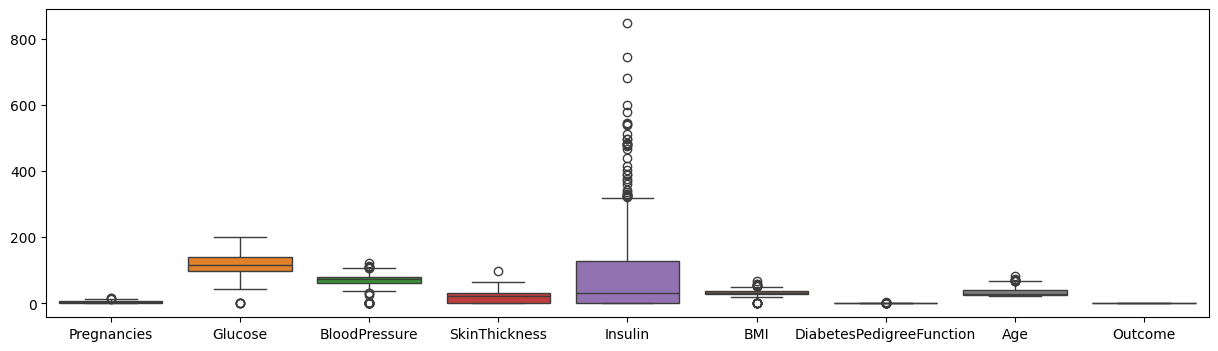

In [19]:
# 전체 feature에 대한 boxplot
plt.figure(figsize=(15, 4))
sns.boxplot(data=diab)

plt.show()

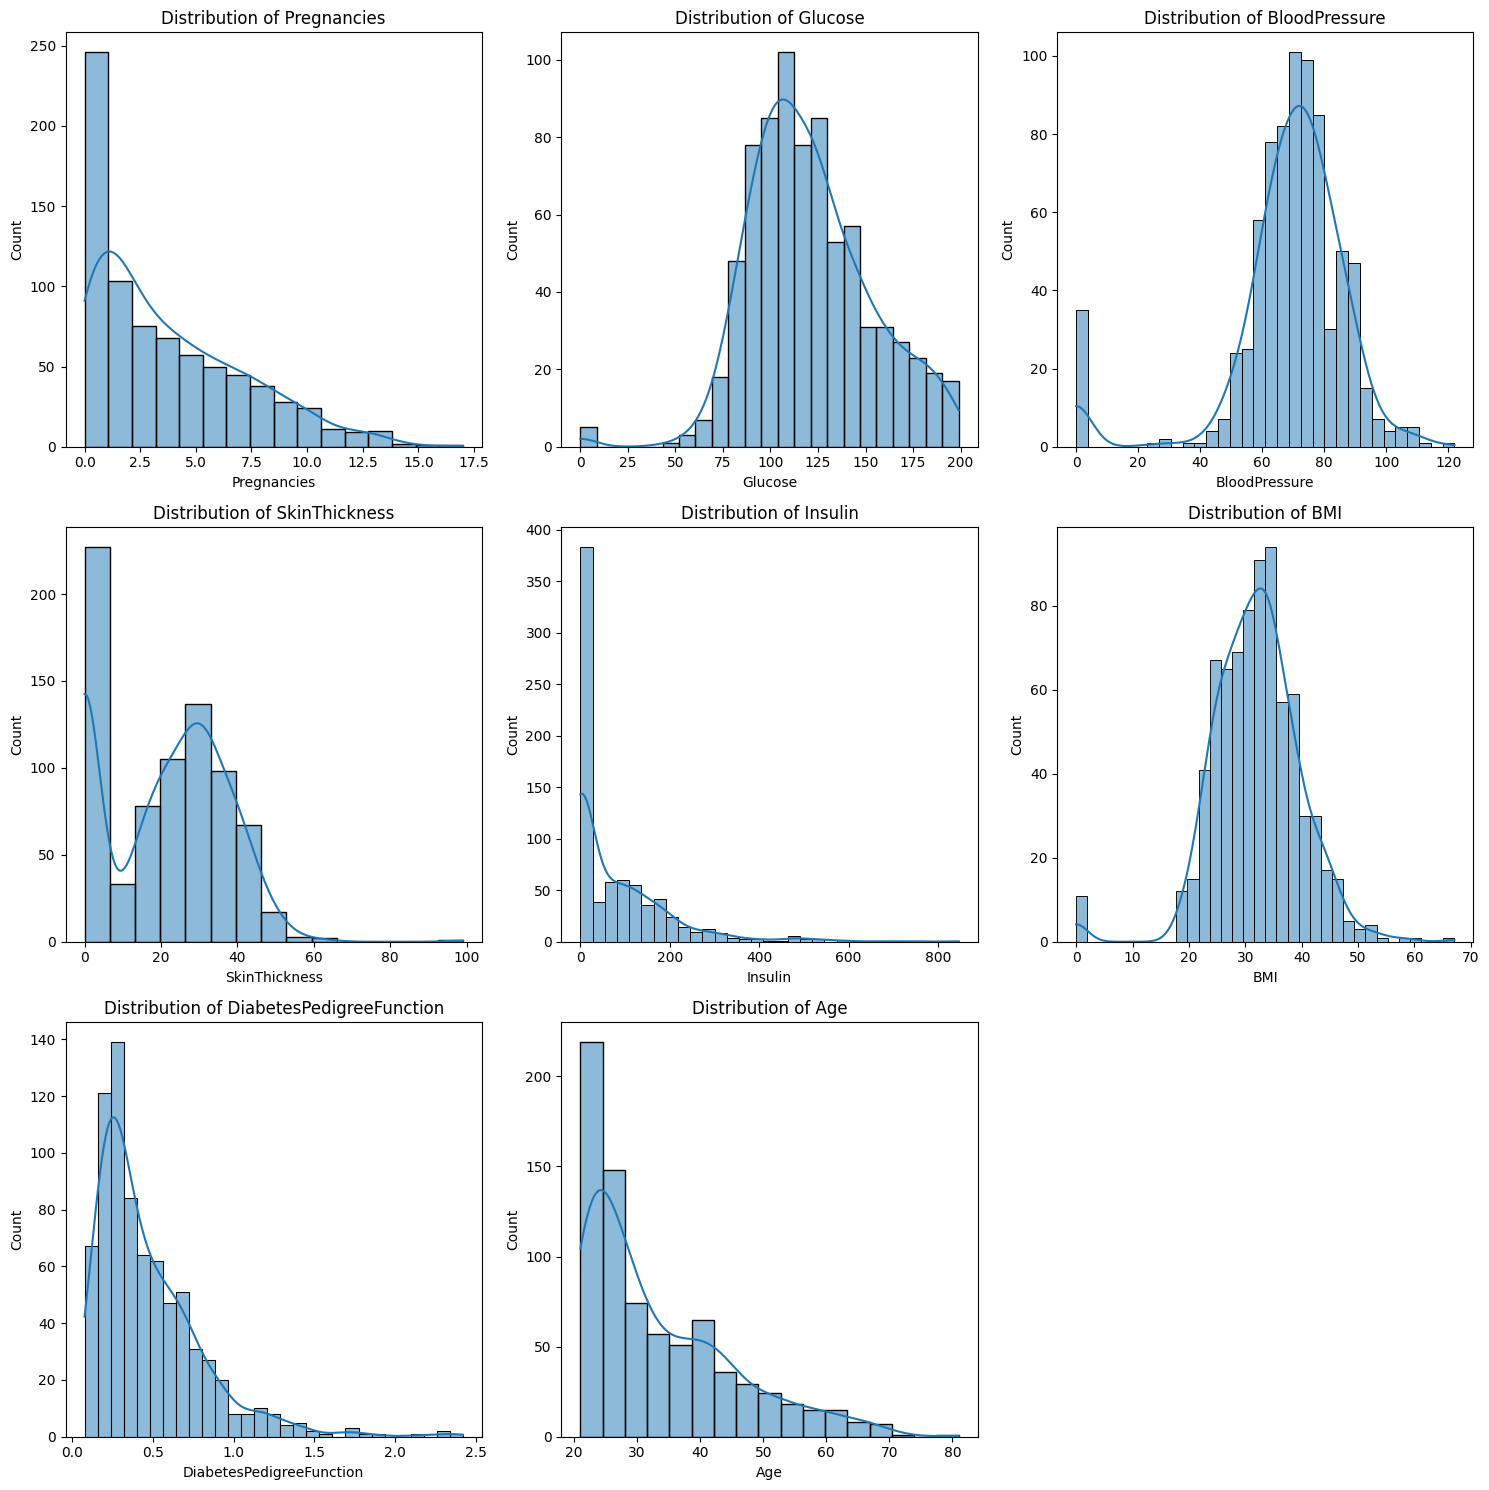

In [20]:
# 각 feature에 대한 분포 확인
features_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

num_cols = len(features_to_plot)
num_rows = int(np.ceil(num_cols / 3))
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

axes = axes.flatten()

# Loop through each feature and plot the distribution
for i, feature in enumerate(features_to_plot):
    sns.histplot(diab[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [21]:
# 각 feature에 대한 skewness 확인
skewness_of_features = diab.apply(lambda x: skew(x))
print("Skewness of features:")
print(skewness_of_features)

Skewness of features:
Pregnancies                 0.899912
Glucose                     0.173414
BloodPressure              -1.840005
SkinThickness               0.109159
Insulin                     2.267810
BMI                        -0.428143
DiabetesPedigreeFunction    1.916159
Age                         1.127389
Outcome                     0.633776
dtype: float64


* 데이터의 skewness(왜도)가 매우 높은 것을 확인할 수 있다. 이를 해결해주기 위해 log transformation을 진행하고자 하였다.
* 일반적으로 skweness가 -0.5에서 0.5일 경우 데이터가 상당히 대칭적이라고 하며 -1에서 1일 경우 적당히 치우쳐있다고 한다.
* 본 분석에서는 데이터가 상당히 치우쳐있다고 판단 가능한 -1보다 작거나 1보다 큰 경우를 선별하여 log transformation을 해주고자 한다.

In [22]:
# skweness의 범위가 1이상이거나 -1이하인 feature을 뽑아낸다.
skewed_columns = skewness_of_features[(skewness_of_features <= -1) | (skewness_of_features >= 1)].index
skewed_columns

Index(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [23]:
# 데이터의 최솟값이 0보다 작은 경우, 로그 변환에 어려움이 있어 describe() 함수를 통해 최솟값을 확인하고자 한다.
diab[skewed_columns].describe()

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000
mean,69.105469,79.799479,0.471876,33.240885
std,19.355807,115.244002,0.331329,11.760232
min,0.000000,0.000000,0.078000,21.000000
25%,62.000000,0.000000,0.243750,24.000000
50%,72.000000,30.500000,0.372500,29.000000
75%,80.000000,127.250000,0.626250,41.000000
max,122.000000,846.000000,2.420000,81.000000


'BloodPressure', 'Insulin'의 최솟값이 0이기 때문에 모든값에 1을 더해주도록 한다.

In [24]:
diab_plus = diab + 1
diab_plus.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,73,36,1,34.6,1.627,51,2
1,2,86,67,30,1,27.6,1.351,32,1
2,9,184,65,1,1,24.3,1.672,33,2
3,2,90,67,24,95,29.1,1.167,22,1
4,1,138,41,36,169,44.1,3.288,34,2


In [25]:
diab_plus.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.845052,121.894531,70.105469,21.536458,80.799479,32.992578,1.471876,34.240885,1.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.078000,22.000000,1.000000
25%,2.000000,100.000000,63.000000,1.000000,1.000000,28.300000,1.243750,25.000000,1.000000
50%,4.000000,118.000000,73.000000,24.000000,31.500000,33.000000,1.372500,30.000000,1.000000
75%,7.000000,141.250000,81.000000,33.000000,128.250000,37.600000,1.626250,42.000000,2.000000
max,18.000000,200.000000,123.000000,100.000000,847.000000,68.100000,3.420000,82.000000,2.000000


In [26]:
diab_log = np.log(diab_plus[skewed_columns])

In [27]:
skewness_of_features_log = diab_log.apply(lambda x: skew(x))
print("Skewness of features(log_transformed):")
print(skewness_of_features_log)

Skewness of features(log_transformed):
BloodPressure              -4.108481
Insulin                     0.065849
DiabetesPedigreeFunction    1.115757
Age                         0.613463
dtype: float64


'Insulin'과 'Age'열에는 log transformation이 알맞지만, 'BloodPressure', 'DiabetesPedigreeFunction'에는 다른 방법을 사용해보고자 한다.

<ipython-input-28-a467b7b32be5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Boxcox_pressure,label="Skewness: %.2f"%(Boxcox_pressure.skew()) )


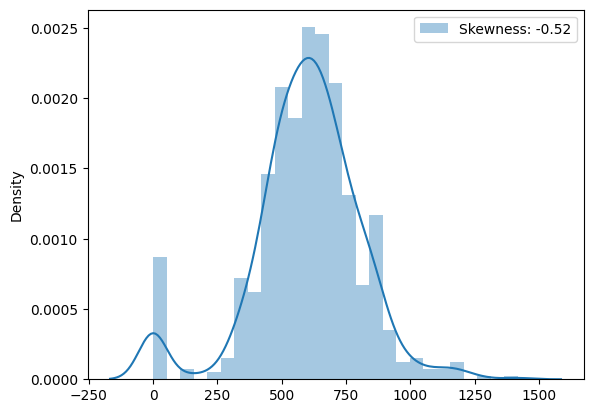

In [28]:
Boxcox_pressure = diab_plus["BloodPressure"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_pressure= stats.boxcox(Boxcox_pressure)
Boxcox_pressure= pd.Series(Boxcox_pressure[0])
t=sns.distplot(Boxcox_pressure,label="Skewness: %.2f"%(Boxcox_pressure.skew()) )
t.legend()

<ipython-input-29-7bb4ea790c46>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Boxcox_func,label="Skewness: %.2f"%(Boxcox_func.skew()) )


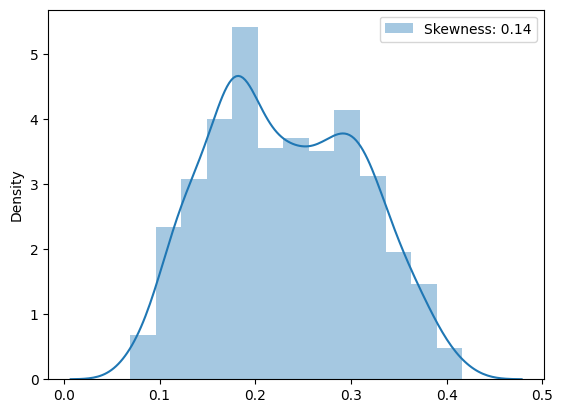

In [29]:
Boxcox_func = diab_plus["DiabetesPedigreeFunction"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_func= stats.boxcox(Boxcox_func)
Boxcox_func= pd.Series(Boxcox_func[0])
t=sns.distplot(Boxcox_func,label="Skewness: %.2f"%(Boxcox_func.skew()) )
t.legend()

'BloodPressure', 'DiabetesPedigreeFunction'의 경우, Box Cox Transformation을 통해 Skeweness가 해결되었다.

In [30]:
diab_plus['Insulin'] = np.log(diab_plus['Insulin'])
diab_plus['Age'] = np.log(diab_plus['Age'])
diab_plus['BloodPressure'] = pd.Series(stats.boxcox(diab_plus['BloodPressure'].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i)))[0])
diab_plus['DiabetesPedigreeFunction'] = pd.Series(stats.boxcox(diab_plus["DiabetesPedigreeFunction"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i)))[0])

In [31]:
# 수치상으로 왜도가 해결된 것을 확인할 수 있다.
skewness_of_features_log = diab_plus.apply(lambda x: skew(x))
print("Skewness of features(log_transformed):")
print(skewness_of_features_log)

Skewness of features(log_transformed):
Pregnancies                 0.899912
Glucose                     0.173414
BloodPressure              -0.515797
SkinThickness               0.109159
Insulin                     0.065849
BMI                        -0.428143
DiabetesPedigreeFunction    0.142043
Age                         0.613463
Outcome                     0.633776
dtype: float64


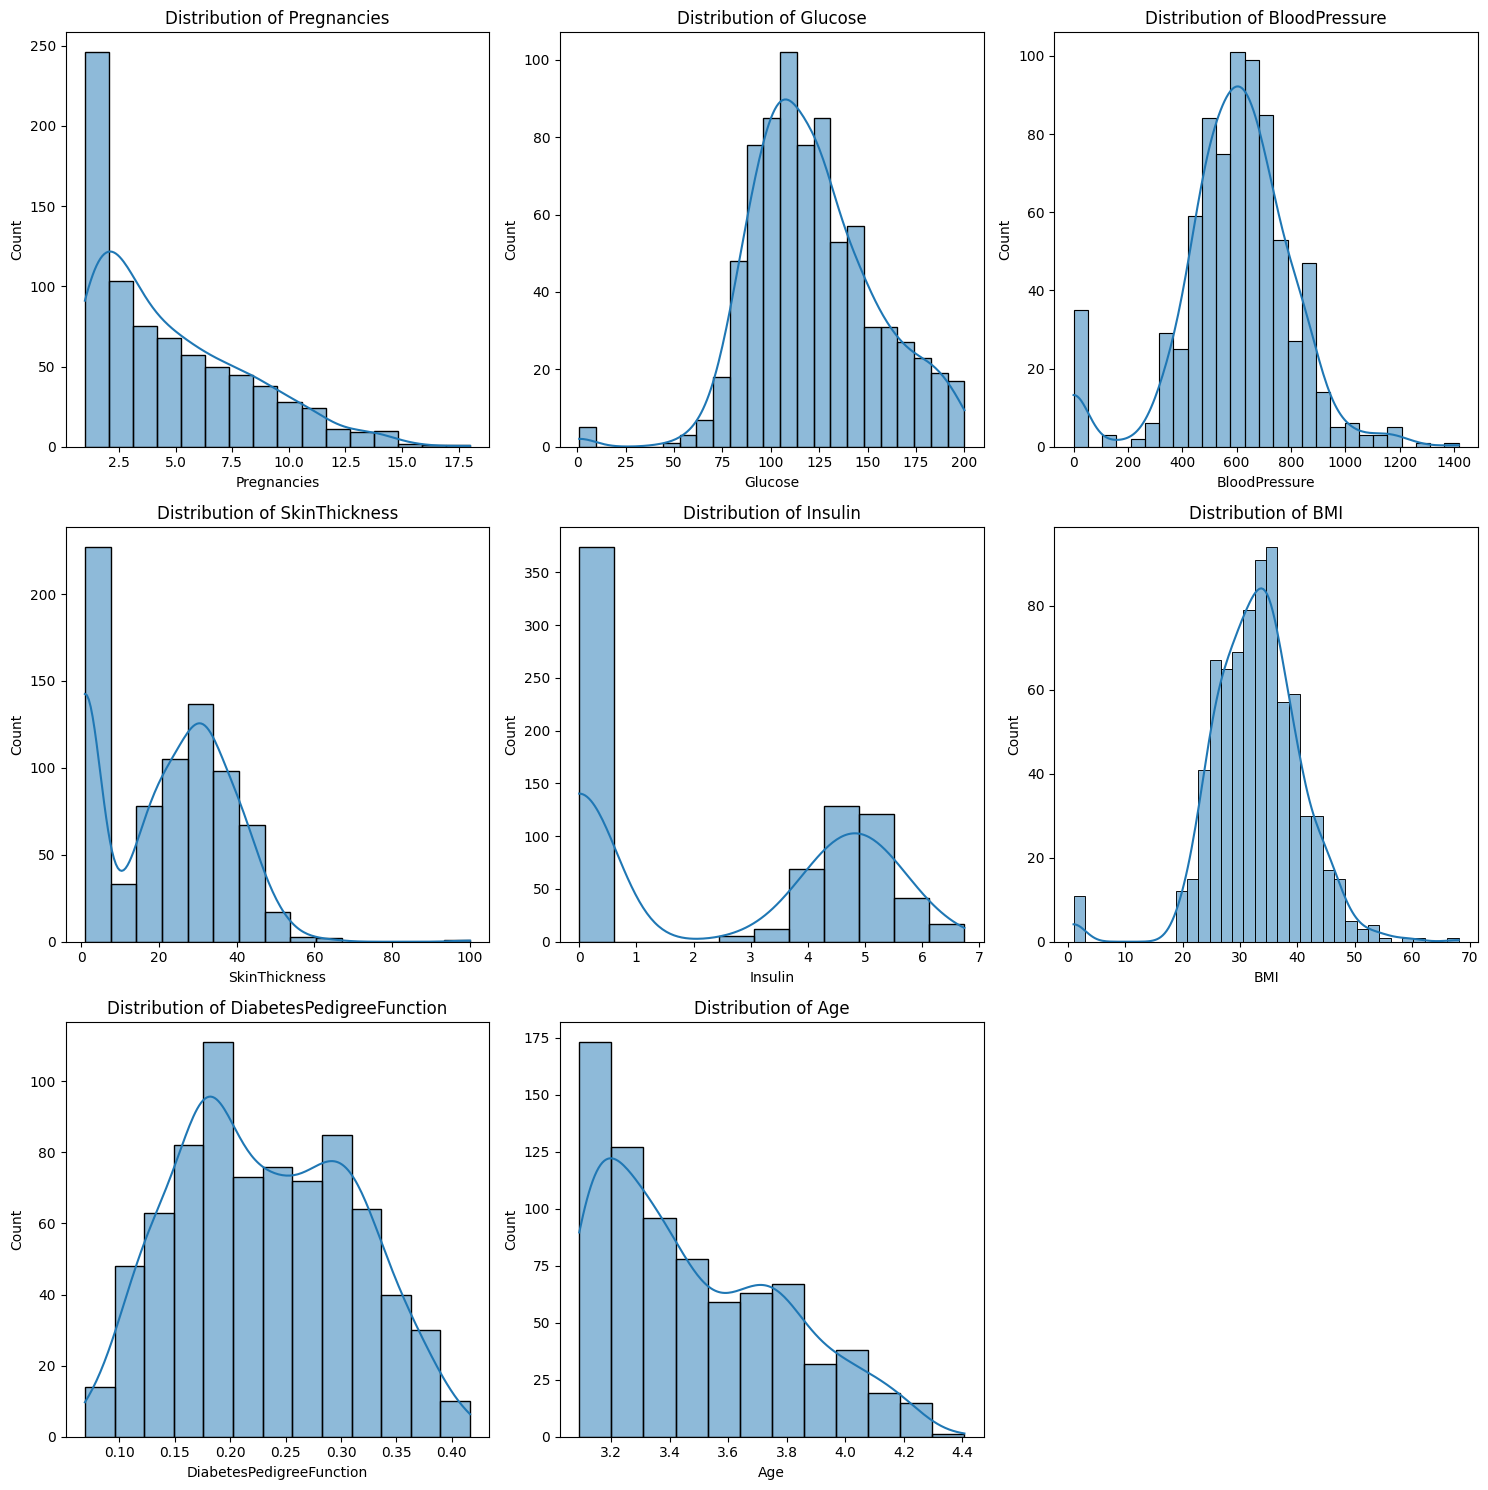

In [32]:
# skweness가 해결되었는지, 분포 그래프를 통해 다시 확인해보고자 한다.
features_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
num_cols = len(features_to_plot)
num_rows = int(np.ceil(num_cols / 3))
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

axes = axes.flatten()

# Loop through each feature and plot the distribution
for i, feature in enumerate(features_to_plot):
    sns.histplot(diab_plus[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Feature selection

Feature ranking:
1, feature Glucose (0.263)
2, feature BMI (0.170)
3, feature Age (0.130)
4, feature DiabetesPedigreeFunction (0.128)
5, feature BloodPressure (0.089)
6, feature Pregnancies (0.080)
7, feature Insulin (0.072)
8, feature SkinThickness (0.068)


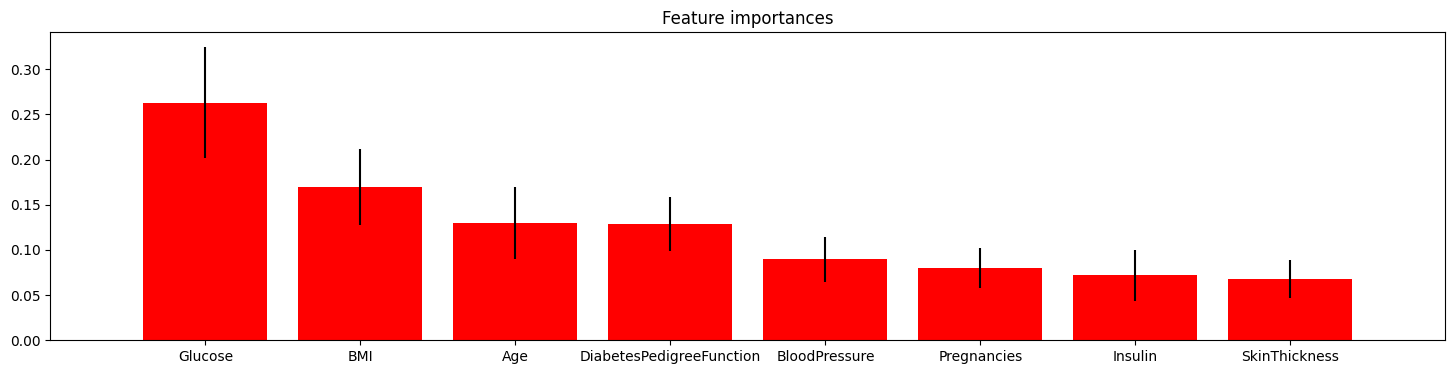

In [33]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

X = diab_plus.drop('Outcome', axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

# Feature importances 시각화
plt.figure(figsize=(18, 4))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color='r', yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

* Glucose를 drop한 경우

In [34]:
columns_to_drop = ['Outcome', 'Glucose']
X = diab_plus.drop(columns_to_drop, axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

Feature ranking:
1, feature BMI (0.216)
2, feature Age (0.184)
3, feature DiabetesPedigreeFunction (0.172)
4, feature BloodPressure (0.120)
5, feature Pregnancies (0.108)
6, feature Insulin (0.107)
7, feature SkinThickness (0.092)


* BMI를 drop한 경우

In [35]:
columns_to_drop = ['Outcome', 'BMI']
X = diab_plus.drop(columns_to_drop, axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

Feature ranking:
1, feature Glucose (0.292)
2, feature DiabetesPedigreeFunction (0.162)
3, feature Age (0.160)
4, feature BloodPressure (0.113)
5, feature Pregnancies (0.103)
6, feature SkinThickness (0.089)
7, feature Insulin (0.082)


* Age를 drop한 경우

In [36]:
columns_to_drop = ['Outcome', 'Age']
X = diab_plus.drop(columns_to_drop, axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

Feature ranking:
1, feature Glucose (0.288)
2, feature BMI (0.194)
3, feature DiabetesPedigreeFunction (0.151)
4, feature BloodPressure (0.105)
5, feature Pregnancies (0.099)
6, feature Insulin (0.082)
7, feature SkinThickness (0.080)


* DiabetesPedigreeFunction를 drop한 경우

In [37]:
columns_to_drop = ['DiabetesPedigreeFunction', 'Outcome']
X = diab_plus.drop(columns_to_drop, axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

Feature ranking:
1, feature Glucose (0.284)
2, feature BMI (0.192)
3, feature Age (0.150)
4, feature BloodPressure (0.108)
5, feature Pregnancies (0.099)
6, feature Insulin (0.086)
7, feature SkinThickness (0.081)


* Pregnancies를 drop한 경우

In [38]:
columns_to_drop = ['Pregnancies', 'Outcome']
X = diab_plus.drop(columns_to_drop, axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

Feature ranking:
1, feature Glucose (0.280)
2, feature BMI (0.178)
3, feature Age (0.154)
4, feature DiabetesPedigreeFunction (0.141)
5, feature BloodPressure (0.099)
6, feature Insulin (0.075)
7, feature SkinThickness (0.074)


* BloodPressure를 drop한 경우

In [39]:
columns_to_drop = ['BloodPressure', 'Outcome']
X = diab_plus.drop(columns_to_drop, axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

Feature ranking:
1, feature Glucose (0.278)
2, feature BMI (0.187)
3, feature Age (0.149)
4, feature DiabetesPedigreeFunction (0.142)
5, feature Pregnancies (0.090)
6, feature Insulin (0.080)
7, feature SkinThickness (0.074)


* SkinThickness를 drop한 경우

In [40]:
columns_to_drop = ['SkinThickness', 'Outcome']
X = diab_plus.drop(columns_to_drop, axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

Feature ranking:
1, feature Glucose (0.277)
2, feature BMI (0.179)
3, feature Age (0.146)
4, feature DiabetesPedigreeFunction (0.137)
5, feature BloodPressure (0.093)
6, feature Pregnancies (0.086)
7, feature Insulin (0.083)


* Insulin를 drop한 경우

In [41]:
columns_to_drop = ['Insulin', 'Outcome']
X = diab_plus.drop(columns_to_drop, axis=1)  # 'Outcome'을 종속 변수로 가정하고 나머지 열은 독립 변수로 사용
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}, feature {} ({:.3f})".format(f+1, X.columns[indices][f],
                                            importances[indices[f]]))

Feature ranking:
1, feature Glucose (0.280)
2, feature BMI (0.178)
3, feature Age (0.149)
4, feature DiabetesPedigreeFunction (0.132)
5, feature BloodPressure (0.092)
6, feature Pregnancies (0.088)
7, feature SkinThickness (0.082)


In [44]:
from sklearn.feature_selection import SelectFromModel

X = diab_plus.drop('Outcome', axis=1)
y = diab_plus['Outcome']

forest = RandomForestClassifier()
forest.fit(X, y)
importances = forest.feature_importances_
model = SelectFromModel(forest, prefit=True)
selected_features = X.columns[model.get_support()]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Glucose', 'BMI', 'Age'], dtype='object')


## classifier model

In [85]:
feature_cols = selected_features.tolist()
X = diab_plus[feature_cols] # Features
y = diab_plus['Outcome'] # Target variable

In [86]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
X_train

,Glucose,BMI,Age
580,152,43.1,3.091042
418,84,19.2,3.332205
764,123,37.8,3.332205
363,147,39.5,4.219508
757,124,37.3,3.970292
...,...,...,...
763,102,33.9,4.158883
192,160,31.4,3.610918
629,95,25.7,3.091042
559,86,31.1,3.583519


In [89]:
X_test

,Glucose,BMI,Age
661,200,43.9,3.135494
122,108,34.6,3.178054
113,77,35.0,3.258097
14,167,26.8,3.951244
529,112,25.6,3.465736
...,...,...,...
165,105,30.9,3.737670
188,110,28.9,3.465736
334,96,24.9,3.135494
758,107,38.5,3.295837


entropy, max_depth = 6인 경우

In [81]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


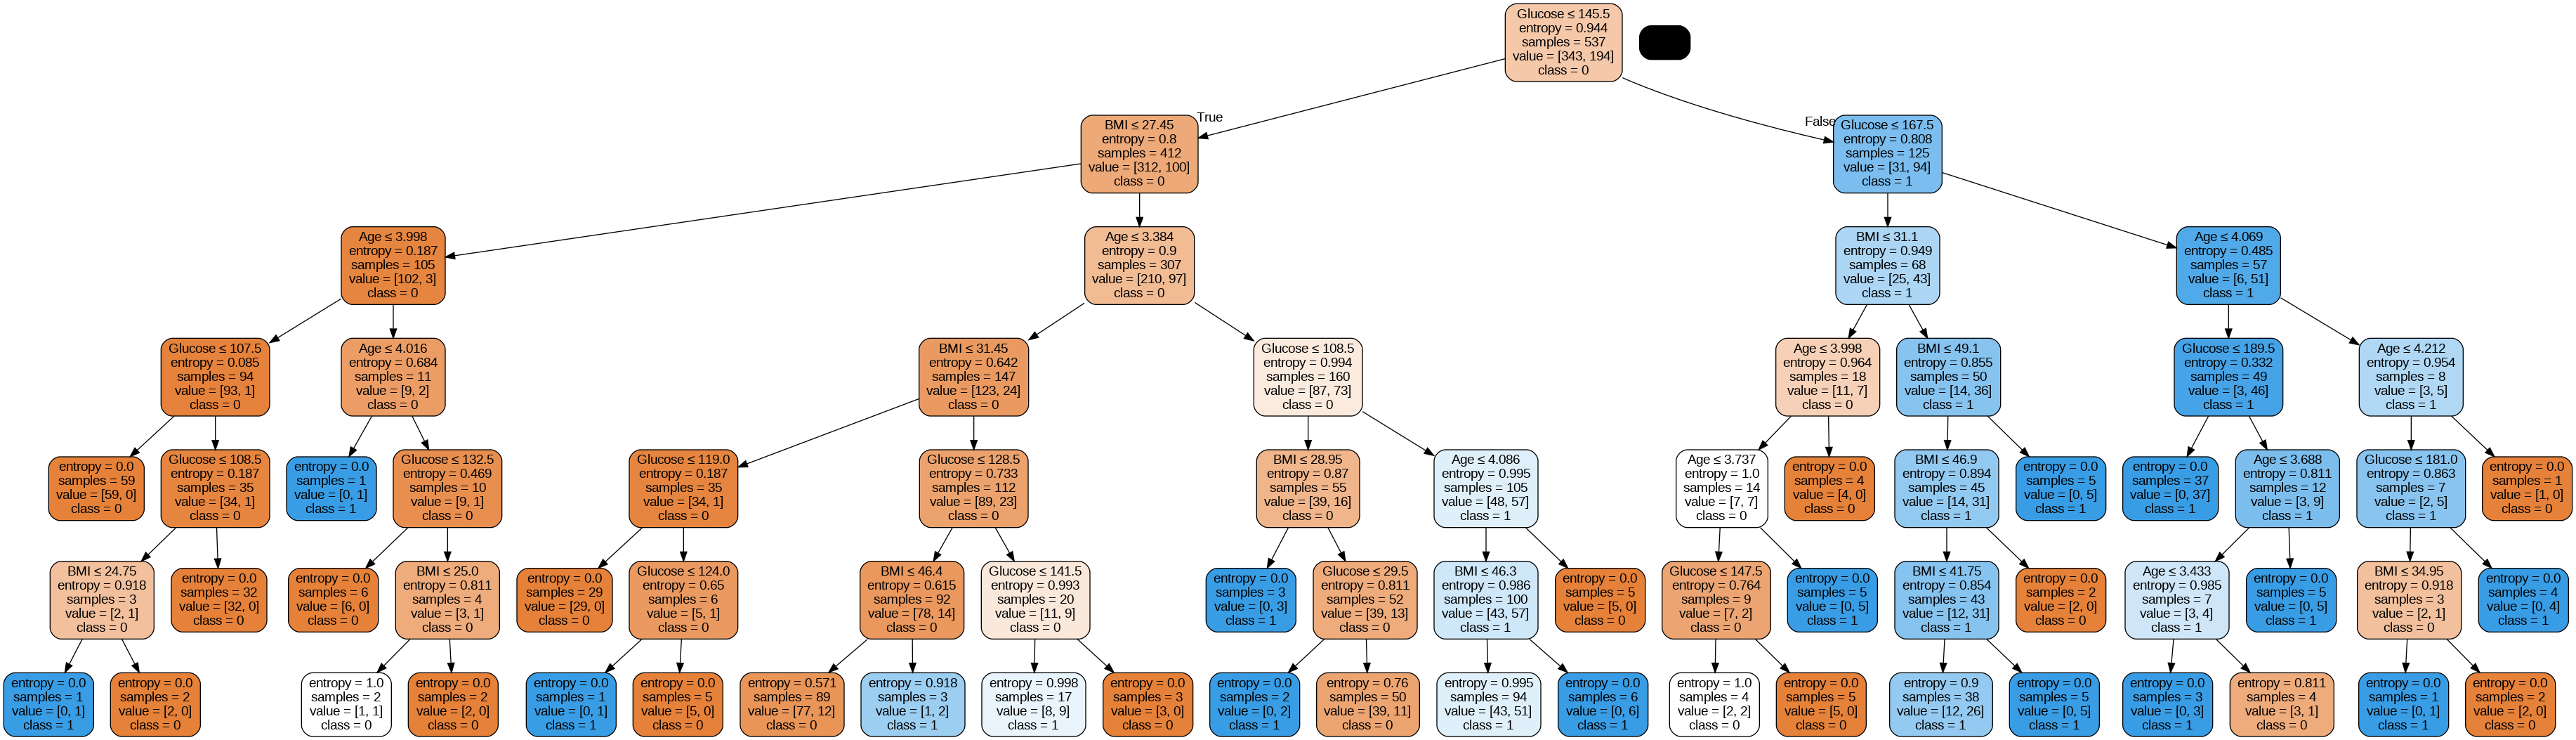

In [82]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

gini, max_depth = 4인 경우

In [83]:
# Create Decision Tree classifer object
clf_2 = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf_2 = clf_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


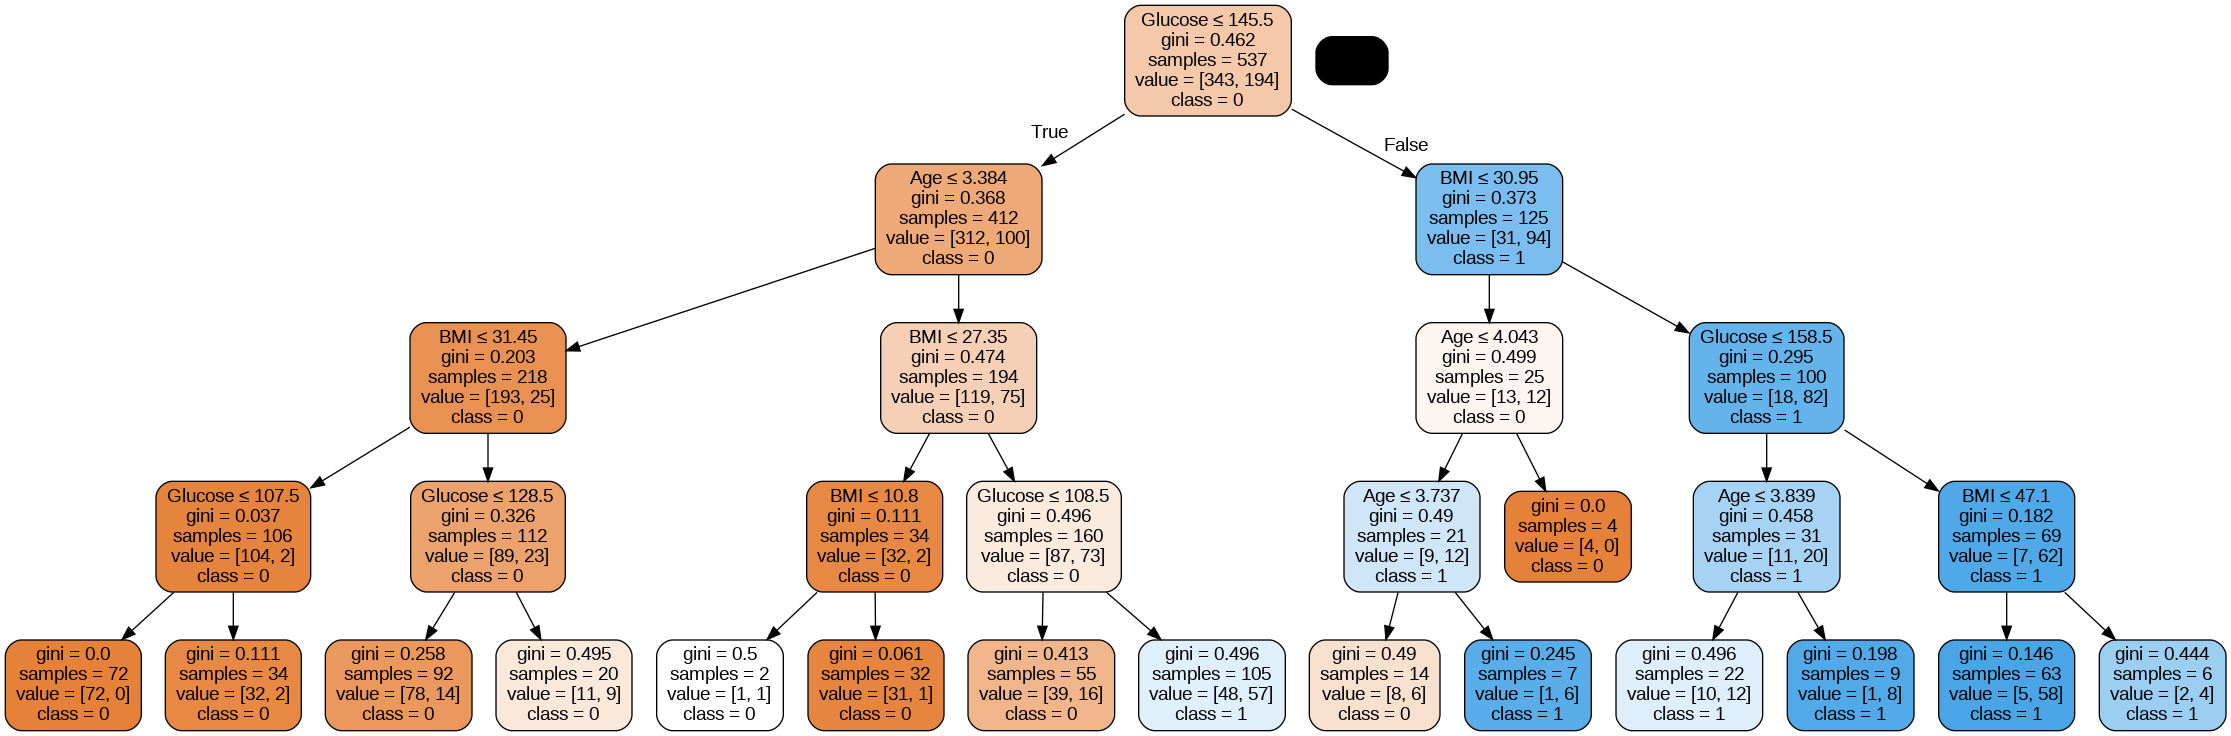

In [84]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())